# 10. 疎構造学習による異常検知

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
from sklearn.covariance import GraphicalLasso

## 10.5 疎構造学習に基づく異常度の計算

## 10.5.2 異常解析の場合

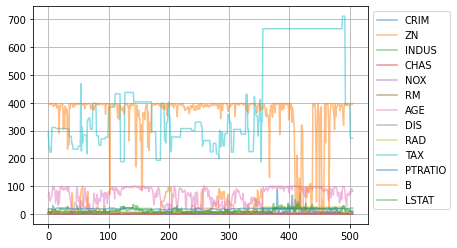

In [2]:
# ボストンの各地区の住宅価格のデータを行列に読込
from sklearn.datasets import load_boston
boston = load_boston()
Xraw = boston.data

# データを表示
fig, ax = plt.subplots(nrows = 1, sharex = True)
ax.plot(Xraw, alpha=0.5)
ax.legend(boston.feature_names, loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()

[graphical_lasso] Iteration   0, cost  5.90e+01, dual gap 6.068e-01
[graphical_lasso] Iteration   1, cost  5.89e+01, dual gap -3.089e-03
[graphical_lasso] Iteration   2, cost  5.89e+01, dual gap -5.723e-05
[graphical_lasso] Iteration   0, cost  inf, dual gap -1.952e-02
[graphical_lasso] Iteration   1, cost  5.68e+01, dual gap 2.970e-04
[graphical_lasso] Iteration   2, cost  5.68e+01, dual gap 3.775e-05


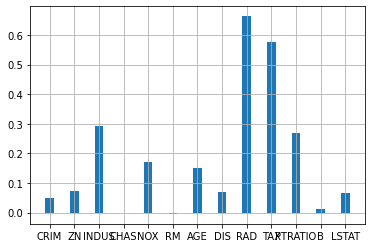

In [3]:
Xtr, X = np.split(Xraw, 2) # データの分割

# トレーニングデータの処理
Xtrc = sp.stats.zscore(Xtr,axis=0) # 中心化したデータ行列
cor_tr = np.cov(Xtrc.T) # 共分散行列の算出
model_tr = GraphicalLasso(alpha=0.25,verbose=True)
model_tr.fit(Xtrc) # グラフィカルラッソの実行
ramda_tr = model_tr.precision_ # 精度行列の取得

# 対象データの処理
Xc = sp.stats.zscore(X,axis=0) # 中心化したデータ行列
cor = np.cov(Xc.T) # 共分散行列の算出
model = GraphicalLasso(alpha=0.25,verbose=True)
model.fit(Xc) # グラフィカルラッソの実行
ramda = model.precision_ # 精度行列の取得

# 異常度の算出
r_diag_tr = np.diag(ramda_tr)
r_diag = np.diag(ramda)
a = (np.log(r_diag/r_diag_tr) / 2) \
     - (
        (np.diag(ramda @ cor @ ramda) / r_diag)
        - (np.diag(ramda_tr @ cor @ ramda_tr) / r_diag_tr)
       ) / 2

# 変数毎の異常度の表示
fig, ax = plt.subplots(nrows = 1, sharex = True)
ax.bar(boston.feature_names, a, 0.35)
ax.set_xticks(boston.feature_names)
ax.set_xticklabels(boston.feature_names)
ax.grid()